# Synthesis Assignment (100)

# Group Information

Use the form fields below to input your group number and group member information.

In [1]:
# @title Group Number { run: "auto" }
groups = list(range(1,23))
Group_Number = 12 # @param [groups] {type:"integer"}
print('Group Number:', Group_Number)

Group Number: 12


In [2]:
# @title Group Member Full Names { run: "auto" }
Group_Member_1 = 'Paola Andrea Gomez Moreno' # @param {type:"string", placeholder:"Enter Full Name 1"}
Group_Member_2 = 'Pavan Dunga' # @param {type:"string", placeholder:"Enter Full Name 2"}
Group_Member_3 = 'Mohit Acharya' # @param {type:"string", placeholder:"Enter Full Name 3"}
Group_Member_4 = 'Vishnu Sathwik Basavaraju' # @param {type:"string", placeholder:"Enter Full Name 4"}
Group_Member_5 = 'Teja Sree Budeti' # @param {type:"string", placeholder:"Enter Full Name 5"}
print('Group Members:')
print(Group_Member_1)
print(Group_Member_2)
print(Group_Member_3)
print(Group_Member_4)
print(Group_Member_5)

Group Members:
Paola Andrea Gomez Moreno
Pavan Dunga
Mohit Acharya
Vishnu Sathwik Basavaraju
Teja Sree Budeti


# Directions
In the Synthesis Assignment, which will be submitted in two parts, your group will perform data mining to solve a real-world business problem. As a group, you will choose one of the following business problems and accompanying dataset.

<br>

| Business Problem (Prediction)| Dataset File Name |
| ----------- | ----------- |
| Income & Audit Success | CompanyAudit.csv|
| Employee Salary & Retention| EmployeeRetention.csv|
| Loan Amount & Approval| LoanApproval.csv|
| Customer CLV & Marketing Campaign Success| MarketingCampaign.csv|
| Telecom Customer CLV & Churn | TeleChurn.csv|

<br>

First, type your group number and group member names in the text cells above. You will include all prerequisite code necessary for your code in Parts 1 and 2 to run in the [Prerequisite Code](#scrollTo=1NApcFUYjX8g) Section below.

Rename this template file - <b>INFO583_SA_Group#.ipynb</b>, where # is the group number. As an example, Group 1's SA submission would be named **INFO583_SA_Group1.ipynb**.

<br>

**Submission:**

Your submission (one per group) for each assignment part will include:
> 1.   ***The link to your Google Colab notebook file***: Submit the link to your notebook file. To do so, click **Share** on the top right-hand side. Then a box will pop-up. You need to change **"restricted"** to **"anyone with the link."** Then, copy the link and paste it as a comment when submitting the assignment on Canvas.
> 2.   ***The notebook file***: Download the same file as ipynb. To do so, Go to **File**, select **Download**. Then Click on **ipynb** on the menu box.
> 3.   ***The PDF version of your notebook file***: Download the same file as pdf. To do so, Go to **File**, select **Print**,A menu box will pop up. Then Click on **PDF** on the menu box. This will convert the file into a PDF file, instead of printing it using a printer.

**Overview:**

<br>

**Part 1**

**Due:** 4/13/2025 at 11:59 PM ET

In Part 1, you will define the business problem, cleanse and preprocess the data, perform exploratory data analysis, and perform linear regression analysis. To complete Part 1, you will fill in the required information in the [Part 1](#scrollTo=cwyEfhMwUTT1) Section.

<br>

**Part 2**

**Due:** 5/4/2025 at 11:59 PM ET

In Part 2, you will perform predictive analysis, evaluate your predictive models, and make recommendations and discuss your results within the context of the business problem. To complete Part 2, you will include all required information for Part 1 and fill in the required information in the [Part 2](#scrollTo=8fZ_eKishBVo) Section.


<hr>
<br>

# Prerequisite Code

In [3]:
#[include any prerequisite code needed to run your code, such as importing packages, here]
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1 (50)

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

**Note:** Your Part 1 submission will only include responses for Part 1. Part 2 should remain blank or hidden in the Part 1 submission.

<br>

**Due:** 4/13/2025 at 11:59 PM ET

**Points:** 50

<br>






## 1.1 Problem Definition & Statement (10)

**1.1 A (5) First, use the code cell below to identify your group's selected dataset and the numerical target variable (column name) that will be used in Part 1 for linear regression analysis and the categorical target variable that will be used in Part 2 for classification analysis.**

In [4]:
# @title Identify Problem/Dataset

Dataset = 'CompanyAudit.csv' # @param ["CompanyAudit.csv", "CCDefault.csv", "CustomerChurn.csv", "EmployeeRetention.csv", "LoanApproval.csv", "MarketingCampaign.csv"]
Numerical_Target_Variable = 'Income' # @param {type:"string"}
Categorical_Target_Variable = 'Audit_Type' # @param {type:"string"}

print(Dataset)
print(Numerical_Target_Variable)
print(Categorical_Target_Variable)


CompanyAudit.csv
Income
Audit_Type


**1.1 B (5) Next, use the text cell below for your problem definition and statement.**

**The problem statement should discuss the following: what is the problem and who it affects, financial/social implications of having a solution to the problem, how the model would be used in practice, and the acceptable level of model performance.**


### Business Case

As a group, we’re working with a dataset that includes demographic and financial information from individuals. Our goal is to tackle two main problems:

>* Predicting a person’s income through regression analysis.

>* Identifying individuals who are more likely to be audited using classification methods.

This type of project can be useful for audit departments or government agencies that want to make better decisions based on data instead of assumptions. It helps them use their resources more efficiently and avoid unfair or random selections.

From a financial and social point of view, being able to predict audits properly could reduce unnecessary costs and prevent people from being audited by mistake. In terms of performance, for the regression model, we’d aim for an R² above 0.6. For the classification part, we’d want the model to reach at least 75% accuracy, while also paying attention to precision and recall to make sure the predictions are reliable and not biased.

<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing (10)


**1.2 A (5) Use the code cell below (and add any additional cells, as necessary) to cleanse and preprocess the data that you will use in your analysis.**

In [8]:
# Load the dataset
data = pd.read_csv('/CompanyAudit.csv')

# View dataset structure and check for missing values
data.info()

# Drop the ID column (not useful for modeling)
data = data.drop('ID', axis=1)

# Convert object type columns to category type
X = data.drop('Audit_Type', axis=1)
y = data['Audit_Type']

# Display the first few rows after cleaning
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2000 non-null   int64  
 1   Age         2000 non-null   int64  
 2   Employment  1900 non-null   object 
 3   Education   2000 non-null   object 
 4   Marital     2000 non-null   object 
 5   Occupation  1899 non-null   object 
 6   Income      2000 non-null   float64
 7   Gender      2000 non-null   object 
 8   Deductions  2000 non-null   float64
 9   Hours       2000 non-null   int64  
 10  Audit_Type  2000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 172.0+ KB


,Age,Employment,Education,Marital,Occupation,Income,Gender,Deductions,Hours,Audit_Type
0,38,Private,College,Unmarried,Service,81838.00,Female,0.0,72,0
1,35,Private,Associate,Absent,Transport,72099.00,Male,0.0,30,0
2,32,Private,HSgrad,Divorced,Clerical,154676.74,Male,0.0,40,0
3,45,Private,Bachelor,Married,Repair,27743.82,Male,0.0,55,1
4,60,Private,College,Married,Executive,7568.23,Male,0.0,40,1


**1.2 B (5) In the text cell below, briefly describe and discuss (in paragraph format) the cleansing and preprocessing steps taken to prepare the data for analysis.**

To get the data ready for our analysis, we first loaded the dataset and used data.info() to understand the structure and check for any missing values. Then, we removed the ID column because it’s just an identifier and doesn’t help with predictions. After that, we separated the target variable Audit_Type from the rest of the dataset so we could clearly define what we’re trying to predict (y) and what we’ll use as predictors (X). Lastly, we displayed the first few rows to make sure everything looked good after those steps.



---



## 1.3 Data: Description & EDA (15)





**1.3 A (8) Use the code cell below (and add any additional cells, as necessary) to describe the data and perform exploratory data analysis (EDA).**

**Description and EDA of the dataset should include: dataset overview, preview, dimensionality, visualization, descriptive statistics.**

Dataset shape (rows, columns): (2000, 10)

First 5 rows of the dataset:


,Age,Employment,Education,Marital,Occupation,Income,Gender,Deductions,Hours,Audit_Type
0,38,Private,College,Unmarried,Service,81838.00,Female,0.0,72,0
1,35,Private,Associate,Absent,Transport,72099.00,Male,0.0,30,0
2,32,Private,HSgrad,Divorced,Clerical,154676.74,Male,0.0,40,0
3,45,Private,Bachelor,Married,Repair,27743.82,Male,0.0,55,1
4,60,Private,College,Married,Executive,7568.23,Male,0.0,40,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         2000 non-null   int64  
 1   Employment  1900 non-null   object 
 2   Education   2000 non-null   object 
 3   Marital     2000 non-null   object 
 4   Occupation  1899 non-null   object 
 5   Income      2000 non-null   float64
 6   Gender      2000 non-null   object 
 7   Deductions  2000 non-null   float64
 8   Hours       2000 non-null   int64  
 9   Audit_Type  2000 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 156.4+ KB

Descriptive statistics:


,Age,Income,Deductions,Hours,Audit_Type
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.622000,84688.460045,67.568333,40.074500,0.231500
std,13.584748,69621.644503,340.704705,12.153716,0.421897
min,17.000000,609.720000,0.000000,1.000000,0.000000
25%,28.000000,34433.117500,0.000000,38.000000,0.000000
50%,37.000000,59768.950000,0.000000,40.000000,0.000000
75%,48.000000,113842.897500,0.000000,45.000000,0.000000
max,90.000000,481259.500000,2904.000000,99.000000,1.000000


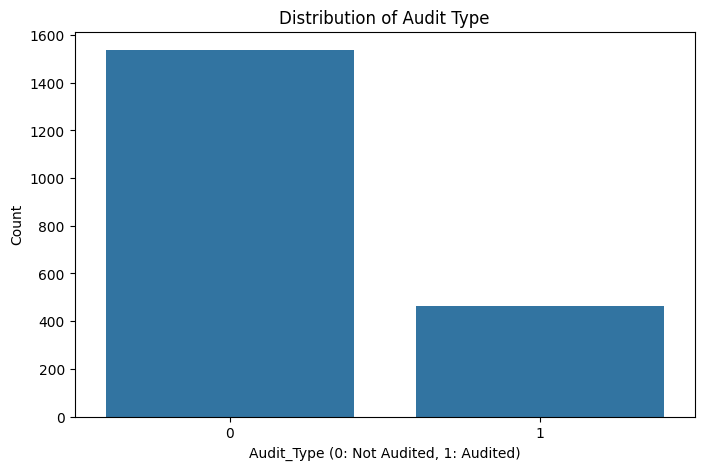

<Axes: >

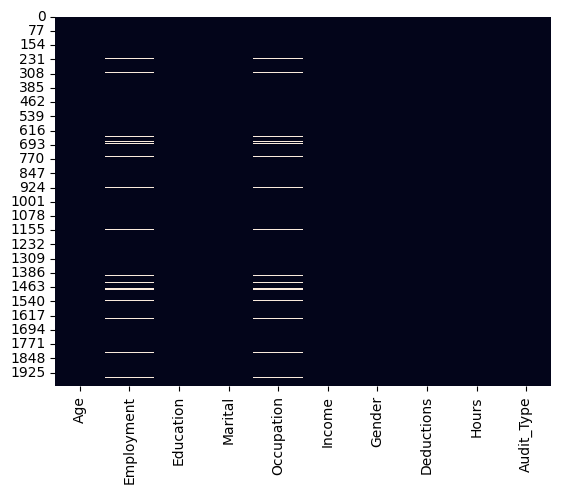

In [9]:
# Dataset overview
print("Dataset shape (rows, columns):", data.shape)

# Preview the dataset
print("\nFirst 5 rows of the dataset:")
display(data.head())

# Summary of data types and non-null values
print("\nDataset info:")
data.info()

# Descriptive statistics
print("\nDescriptive statistics:")
display(data.describe())

# Visualization: Distribution of the numerical target variable (Income)
plt.figure(figsize=(8, 5))
sns.countplot(x='Audit_Type', data=data)
plt.title('Distribution of Audit Type')
plt.xlabel('Audit_Type (0: Not Audited, 1: Audited)')
plt.ylabel('Count')
plt.show()
# One-hot encode the categorical features in your existing dataframe (df)
categorical_cols = ['Employment', 'Education', 'Marital', 'Occupation', 'Gender']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Visualization: Heatmap of missing values
sns.heatmap(data.isnull(), cbar=False)

**1.3 B (7) In the text cell below, describe (in paragraph format) the dataset and any important findings from your description and EDA. A discussion of class imbalance should also be included, if present, and strategies for handling any imbalance should be included.**

During the exploratory data analysis, we noticed that some columns—especially categorical ones like Employment and Occupation—contain missing values. This was clearly shown in the heatmap. We also observed that the target variable Audit_Type is imbalanced, with significantly more records labeled as 0 (Not Audited) than 1 (Audited). This class imbalance could impact the performance of our classification models, so it may be necessary to apply techniques like class weighting or sampling strategies later in the analysis to address it.

## 1.4 Linear Regression Analysis (15)

**1.4 A (10) Perform Linear Regression Analysis to predict the numerical target variable identified in Question 1.1 A.**

**NOTE: Do not include the categorical target variable as a predictor variable in your model.**


In [10]:
# Define features and target variable
X = data_encoded.drop(columns=['Income', 'Audit_Type'])  # Do not include categorical target
y = data_encoded['Income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

**1.4 B (2.5) Evaluate your model performance.**

In [11]:
# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("R² Score:", r2)

Mean Squared Error (MSE): 3835016785.1914353
Root Mean Squared Error (RMSE): 61927.51234460686
Mean Absolute Error (MAE): 41330.70
R² Score: 0.31091142162641416


**1.4 C (2.5) Is this a good model to predict your target variable? Why or why not? Explain.**

Based on the model’s performance, this is not a strong model for predicting income. The R² score is 0.31, meaning the model explains only 31% of the variation in income. This indicates that most of the variation is left unexplained, limiting the model's predictive usefulness.

The Root Mean Squared Error (RMSE) is approximately 61,927, and the Mean Absolute Error (MAE) is around 41,331. These values reflect the average size of the prediction errors. In practical terms, the model is often off by more than 40,000, which is a large margin when predicting someone’s income.

This poor performance suggests that key factors that influence income may be missing from the dataset, or that the relationships between income and the available features are not linear. Because linear regression assumes linear relationships, it may not capture complex patterns present in the data. Therefore, this model is not reliable for predicting income in its current form.



---

<br>



# Part 2 (50)

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your Synthesis Assignment Part 2 submission should include all Part 1 and Part 2 code and responses.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

<br>

**Due:** 5/4/2025 at 11:59 PM ET

**Points:** 50






## 2.1 Classification Analysis (25)

**2.1 (25) Perform (at least) 4 types of classification analysis demonstrated in the course.**

**NOTE: Do not include the numerical target variable as a predictor variable in your models.**

## 2.2 Model Evaluation (15)

**2.2 A (8) Evaluate the performance of all models.**

**2.2 B (7) Based on your output in 2.2A, discuss and compare the performance for each of the classification models. Which model is preferred? Why? Explain.**

## 2.3 Discussion & Conclusion (10)

**2.3 (10) Briefly summarize the problem statement and data. Then, discuss your analysis and findings in depth. Within the context of the business problem and your analysis results (regression and classification), provide business recommendations. Be sure to discuss any limitations, constraints, or ethical concerns that could impact the implementation of the recommended solution.**